# Logistic Regression Example

### 生成数据集， 看明白即可无需填写代码
#### '<font color="blue">+</font>' 从高斯分布采样 (X, Y) ~ N(3, 6, 1, 1, 0).<br>
#### '<font color="green">o</font>' 从高斯分布采样  (X, Y) ~ N(6, 3, 1, 1, 0)<br>

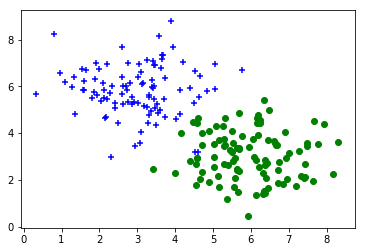

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(6., 1, dot_num)
y_n = np.random.normal(3., 1, dot_num)
y = np.zeros(dot_num)
C2 = np.array([x_n, y_n, y]).T

plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')

data_set = np.concatenate((C1, C2), axis=0)
np.random.shuffle(data_set)





## 建立模型
建立模型类，定义loss函数，定义一步梯度下降过程函数

填空一：实现sigmoid的交叉熵损失函数(不使用tf内置的loss 函数)

In [6]:
epsilon = 1e-12
class LogisticRegression():
    def __init__(self):
        self.W = tf.Variable(shape=[2, 1], dtype=tf.float32, 
            initial_value=tf.random.uniform(shape=[2, 1], minval=-0.1, maxval=0.1))
        
        self.b = tf.Variable(shape=[1], dtype=tf.float32, initial_value=tf.zeros(shape=[1]))
        
        self.trainable_variables = [self.W, self.b]
    @tf.function
    def __call__(self, inp):
        logits = tf.matmul(inp, self.W) + self.b # shape(N, 1)
        pred = tf.nn.sigmoid(logits)
        return pred

@tf.function
def compute_loss(pred, label):
    if not isinstance(label, tf.Tensor):
        label = tf.constant(label, dtype=tf.float32)
    pred = tf.squeeze(pred, axis=1)
    '''============================='''
    #输入label shape(N,), pred shape(N,)
    #输出 losses shape(N,) 每一个样本一个loss
    #todo 填空一，实现sigmoid的交叉熵损失函数(不使用tf内置的loss 函数)
    '''============================='''
    
    losses = tf.nn.sigmoid_cross_entropy_with_logits(labels=label,logits = pred)
    
    loss = tf.reduce_mean(losses)
    
    
    pred = tf.where(pred>0.5, tf.ones_like(pred), tf.zeros_like(pred))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(label, pred), dtype=tf.float32))
    return loss, accuracy
@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss, accuracy = compute_loss(pred, y)
        
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss, accuracy, model.W, model.b

### 实例化一个模型，进行训练

In [7]:
if __name__ == '__main__':
    model = LogisticRegression()
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    x1, x2, y = list(zip(*data_set))
    
    x = list(zip(x1, x2))
    animation_fram = []
    
    for i in range(200):
        
        loss, accuracy, W_opt, b_opt = train_one_step(model, opt, x, y)
        animation_fram.append((W_opt.numpy()[0, 0], W_opt.numpy()[1, 0], b_opt.numpy(), loss.numpy()))
        if i%20 == 0:
            print(f'loss: {loss.numpy():.4}\t accuracy: {accuracy.numpy():.4}')

loss: 0.7492	 accuracy: 0.08
loss: 0.7281	 accuracy: 0.495
loss: 0.7096	 accuracy: 0.5


loss: 0.6949	 accuracy: 0.5
loss: 0.6835	 accuracy: 0.5


loss: 0.6742	 accuracy: 0.51
loss: 0.6661	 accuracy: 0.52
loss: 0.6589	 accuracy: 0.545


loss: 0.6522	 accuracy: 0.6
loss: 0.6459	 accuracy: 0.64


## 结果展示，无需填写代码

<video width="432" height="288" controls autoplay loop>
  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAEIz21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAADMwZYiE
ADf//vbw/gU2O5jQlxHN6J0y+d8JtMfUAth7yboi2eZ6iJwr0iBz77s9TCpDPLL10GtTD5nCZzNT
qv2VQ7t7X0UeCwukVpFrALLDQr2QP2wadcpDzDvwXMsNPOWatqcPlUnOBjdcXdQK2qBo/iG1s3Cw
0cDgIpIPQ2uniusHYjOnfuHPjvu5HpJXadKqIwiUsy3v2KV2kmOs5qwvNM052pLWkuP6Pqcu1sfa
Z4GQaWtEChg1FVClglYwzSPLv2kWYn88TXo2pJatTqZLMhJEdQwMFP7arAdi1VtBpJu64Cjqxa0I
J8WrpHmt+g9gtm/s0OGbVvdpmRRqiKn5cTqU7XFri2HjIjJjdeL8X4f7UNIGSAOutD38qXyw0MIE
Tfr8PD6N1R3qJ+oY3ftbmBfIRyeXfzw1PRyx4Gi6zuuxj64V5yQ2ddYZ5WLtoudZftZAOkHB0KSi
mpgkxVWeCYcKEdKf1D4uYjefOg0JyCGey70GyR+TCGWzB+85MgAQo1+kzwsN1CfkoxXlX6M5VztV
d1reB5Twj+vTpXkmHP5Tt1hAeqNW9ha3uOKQ+4/BCsJ65Rb7Z3g86yehOFUY7ggtTUpuJAUyJAG8
HoMZh2cTIzzIPZAf+HtblRhEe3aatKszi4+y+X78xpXBYU7TtwM+FtHUpRNmEuQZ4QA11ZwwfzFK
kWefdK9AKTaA1FzACpyjtO22bMkhsfDbRcTHfVRKXQS/p6xhAZRslp9JbA8UKCE/XRV2Wi2O4xPR
4a3gI4mxylGWcBW+oEE1MFSTJ6C8IPrkHbI1BQwpRViMUplw5zs9gRxWjC2Ex4Xah4W0gAyLzQ+y
HyFM4qgQ1npkP9Vr7qRzoJU5uIkQVM2dIoetjTjMxu8wxob3Pp+leCXglX6jP0HP6VhXyz/ZQ/NH
DFOolKDdScO8WuibQpERP0jE4LEnHzRRTmcoUB3iAkdz9+1xDDhsicqMYsf3xbEvE847BTjOgqcD
/mK3tbyw2D4mh+GQjUi4qqgbaZcMjXGt22AWn5wGSM0eg4fvaVnHJ1kMX5iG5wx/VFaLl/txt8zb
vYPWytK6NeOdk8U4cAu14JuQ8VUTDQnH0J0AxbUaNzbUOI+LUiIsNzoVY0q2DoWimqo45obXsZFD
AjVhCOMWe1Wr4ly5JKvMLIgaWAfmpbGU62TSch4vDl4ealX/EuUiFF4N6DYGH4wlxBkeFCkKSUTX
R40rTmurglB+5GigZl1h+9Gv4idQptUixJpv/ey+ESgztKqIrAWFpaqsq719kVp5Mk3QNu8qalks
aHABp/j0TnKx81I+StqBAtOKHJxUA2xaJdbMvC+8lAmK54CNW4oySuohnaxp1q921qfTu9xuj2sJ
k/T6T1xMQ1ylpJCxbL0hpMuMTAG7vAjeAKOxWK+6NThXNNj4qdcq1eFCiSRwAwDaRzVE+x0wCZAZ
9nw5BSPfSkCEC5yiCqfNRMHAlRIhd5wHy5/aa6VxB37mJaZi6w4jxjvUqLvFKPrF0oF/59NRB2zG
AZSH1JuMeh1iGf/IbT4+68K69Rutt9pU+hWFubbQbdigMSwWb4Uu58fAHy1nZq53IXkVqboO0SFj
FPBpbYcAXg+2TWCBVmbP4ainBfHRdo1R0lbPVCthO/pgd2O44O5QegZp7Yiyej31GJXRaKuheHID
lNV7gWzzYKzBaeKa4wHdoCOBnUOOeMDxSNKLymD1XK88tMH/M0JYhBejRnFwTMWZnR4BjYPhydaL
r965R8EMTWvzVIkLDvNIh8CazxFnLqldK3tlwOO2Ndb6B8blLkdvZygjJlN5hQIWQQ95W4NVBgIH
5HldcvzLj0ElYtYyaX5ejCcFThQAwVbqJgn7kzkymKac1+TjP79GcfybNjuxfoIzJsAEhIxhXl+1
YXfAquZ4V3wpirOenF9VI1CJBF0J0u0lZGpcg0jJjUTGEUl/IZl7AEFxF2VR0sejOddjWq3pOB2i
TKi0wPuasXYEDw0rFSoY9kWsZ7wsHDOG4Cynl5UtRlCJ7lS5jFHvoYLmsKcQZ1DrMrg4GSX7fxJ5
YgZYfFmVFusIdF33aeqj9yAKrF+4xgsqk+kV/NQCRzIW8wIDSBiX0gn881qxL3FQzt1JtKRrGvzY
1Kdv5gtQ9nQM956su+I6FVZG1Lx4S/V1eKukZ7B8wiDh+gMHUusJl//nCl74tYR9u+d6TEa4Wngb
QvZSzxCQCJVCfjC5HSbVAppTDopkw5SYNGczPR7UjTMVXE3WGRTACg6VwKae4RtmgvZWnxnKGVUy
NDdBzVmDanxOL//BUr1LkBrrPYapbO+D2biE0dmIzfeR4fxPT8y47Wl4jCqBAy0PBzc+yILMw7E/
sq5EzwHQoXXL3AJZQ+om1PEou74ysVVscHiQ/Xihdwv75I8lG0ySVRMVE+7fTeZmSkH4Z+fq6CAl
f5ESc6Dg7Mhx/XNcU3abBmU3+1yMIUEUnkttyiOd1ywl5Y53fHsLY00oYaGkVbMvYwvdPRdKHi81
+ilFZ7kz0S5gf8yUD51nIHzsJTk12B+bu5cbZKiDreKRZazq8KX7AdXsmni0jcf0x9FxTGPtaA95
1yVD8vn39Uw8uhkhv3k7iFNwfwnOUyz6MfrZE52NzQgnb70Mb+SptoMpUiJdPxH+h/EiIq3pP7Bj
TlCyAJYJ8fGgxOPA9IrgK07N3Wjx6SGNoYQxS02L++UHtaZ4uljYSc6rizGlsrb6Nrr6WaU1wpyF
l/9ysV1w7iigq1fL47m+2c0EyTniSe5nBxPZf81GE4DTVljh2NZf20DWnxuT/DR5qODphnAh+Zh+
s/nmgQWGF3QiSN01n/ACjoge4nMYwCkmHDbHrhbG

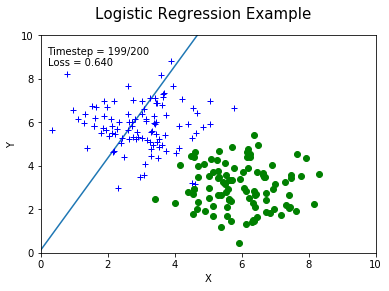

In [8]:

f, ax = plt.subplots(figsize=(6,4))
f.suptitle('Logistic Regression Example', fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

line_d, = ax.plot([], [], label='fit_line')
C1_dots, = ax.plot([], [], '+', c='b', label='actual_dots')
C2_dots, = ax.plot([], [], 'o', c='g' ,label='actual_dots')


frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
# ax.legend()

def init():
    line_d.set_data([],[])
    C1_dots.set_data([],[])
    C2_dots.set_data([],[])
    return (line_d,) + (C1_dots,) + (C2_dots,)

def animate(i):
    xx = np.arange(10, step=0.1)
    a = animation_fram[i][0]
    b = animation_fram[i][1]
    c = animation_fram[i][2]
    yy = a/-b * xx +c/-b
    line_d.set_data(xx, yy)
        
    C1_dots.set_data(C1[:, 0], C1[:, 1])
    C2_dots.set_data(C2[:, 0], C2[:, 1])
    
    frame_text.set_text('Timestep = %.1d/%.1d\nLoss = %.3f' % (i, len(animation_fram), animation_fram[i][3]))
    
    return (line_d,) + (C1_dots,) + (C2_dots,)

anim = animation.FuncAnimation(f, animate, init_func=init,
                               frames=len(animation_fram), interval=30, blit=True)

HTML(anim.to_html5_video())

